# Metric
My metric is the crime per neighborhood. In order to determine whether a neighborhood is truly the best, crime seemed like the best way to approach this. The smaller amount of crime normally correlates to the overall safety of the neighborhood. In my dataset, each neighborhood's crimes were listed and for each crime was an integer value that rated how severe the crime was where 1 was the most severe. By finding the count, average, severe crimes, and counts of crime per neighborhood, we should be able to find the best neighborhood.

# What's Happening?
First I load my dataset into 4 different dictionaries. One holds each neighborhood and its correpsponding total hierarchy rating, the other holds each neighborhood's total count of crime, another holds the neighborhoods with crimes that are labeled from 1-14 in severity, and lastly a dataset holds the count of crimes per neighborhood that falls between 1-14 in severity. I chose 1-14 because these crimes included violence against another person, while the rest excluded this. For reference, the 1 ranking is the most severe a crime can be ranked. 

Next I sorted my dictionary which held the counts of crimes per neighborhood and plotted it.


# Count of Crimes per Neighborhood

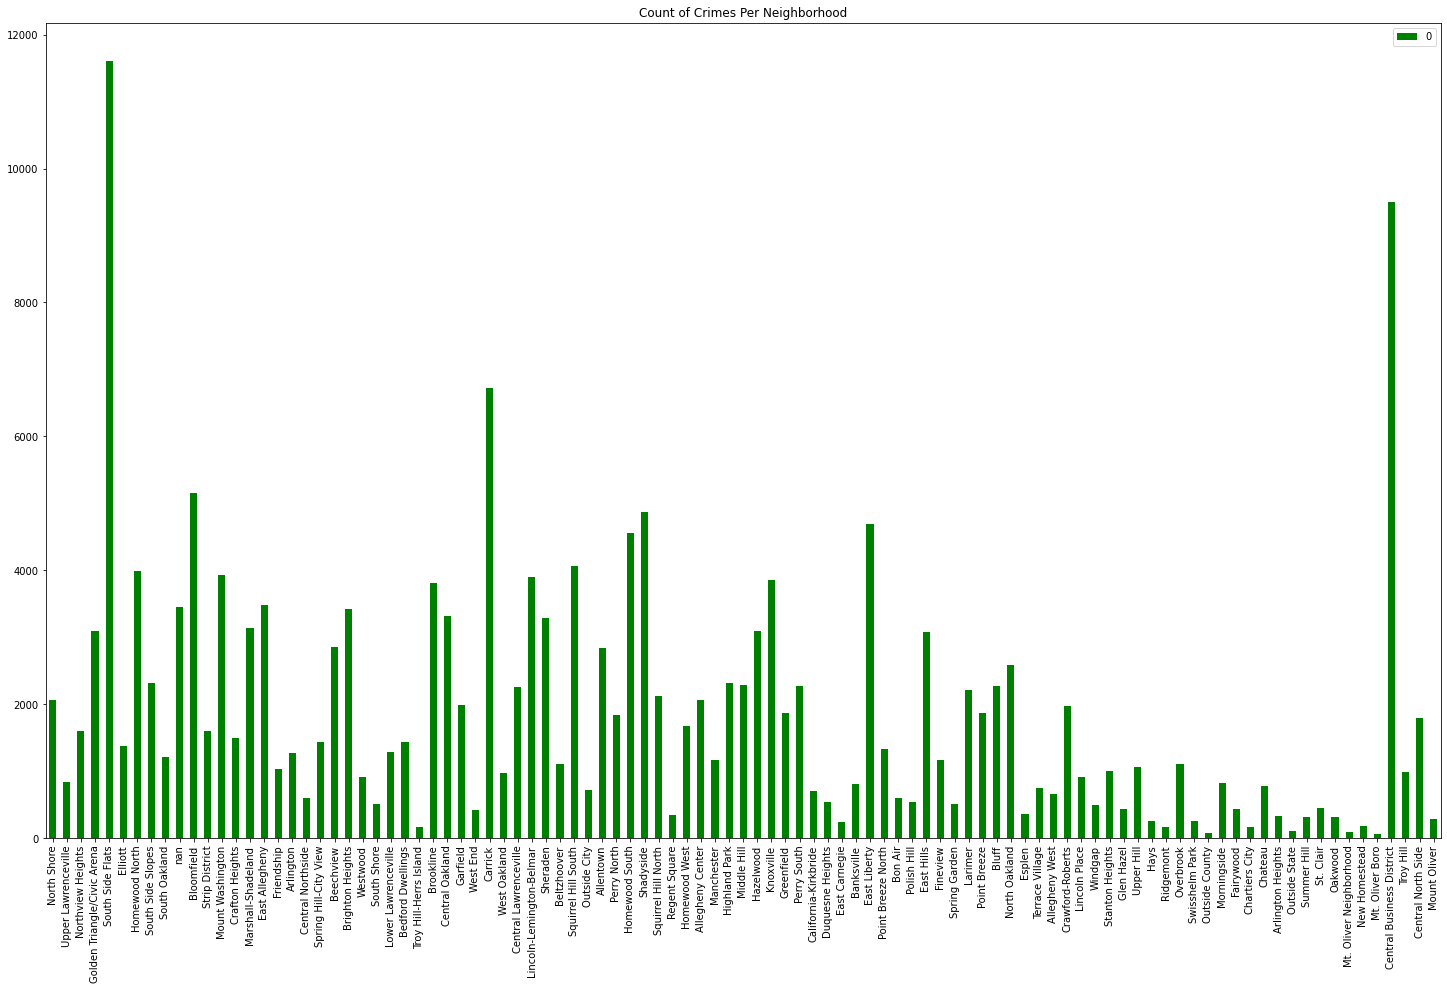

In [2]:
import pandas as pd
import geopandas
%matplotlib inline

chip = pd.read_csv("data/CrimeRate.csv")

dict = {}
dict_count = {}
for index, row in chip.iterrows():
    if not row['INCIDENTNEIGHBORHOOD'] in dict and row["HIERARCHY"] < 99:
        dict[row['INCIDENTNEIGHBORHOOD']] = row['HIERARCHY']
        dict_count[row['INCIDENTNEIGHBORHOOD']] = 1
        
    elif row["HIERARCHY"] < 99:
        dict[row['INCIDENTNEIGHBORHOOD']] = dict.get(row['INCIDENTNEIGHBORHOOD']) + row['HIERARCHY']
        dict_count[row['INCIDENTNEIGHBORHOOD']] = dict_count.get(row['INCIDENTNEIGHBORHOOD']) + 1

count_df = pd.DataFrame.from_dict(dict_count, orient = 'index')

count_df.plot(kind = "bar", figsize=(25,15), color= "green", title = "Count of Crimes Per Neighborhood")



# Sorted Count

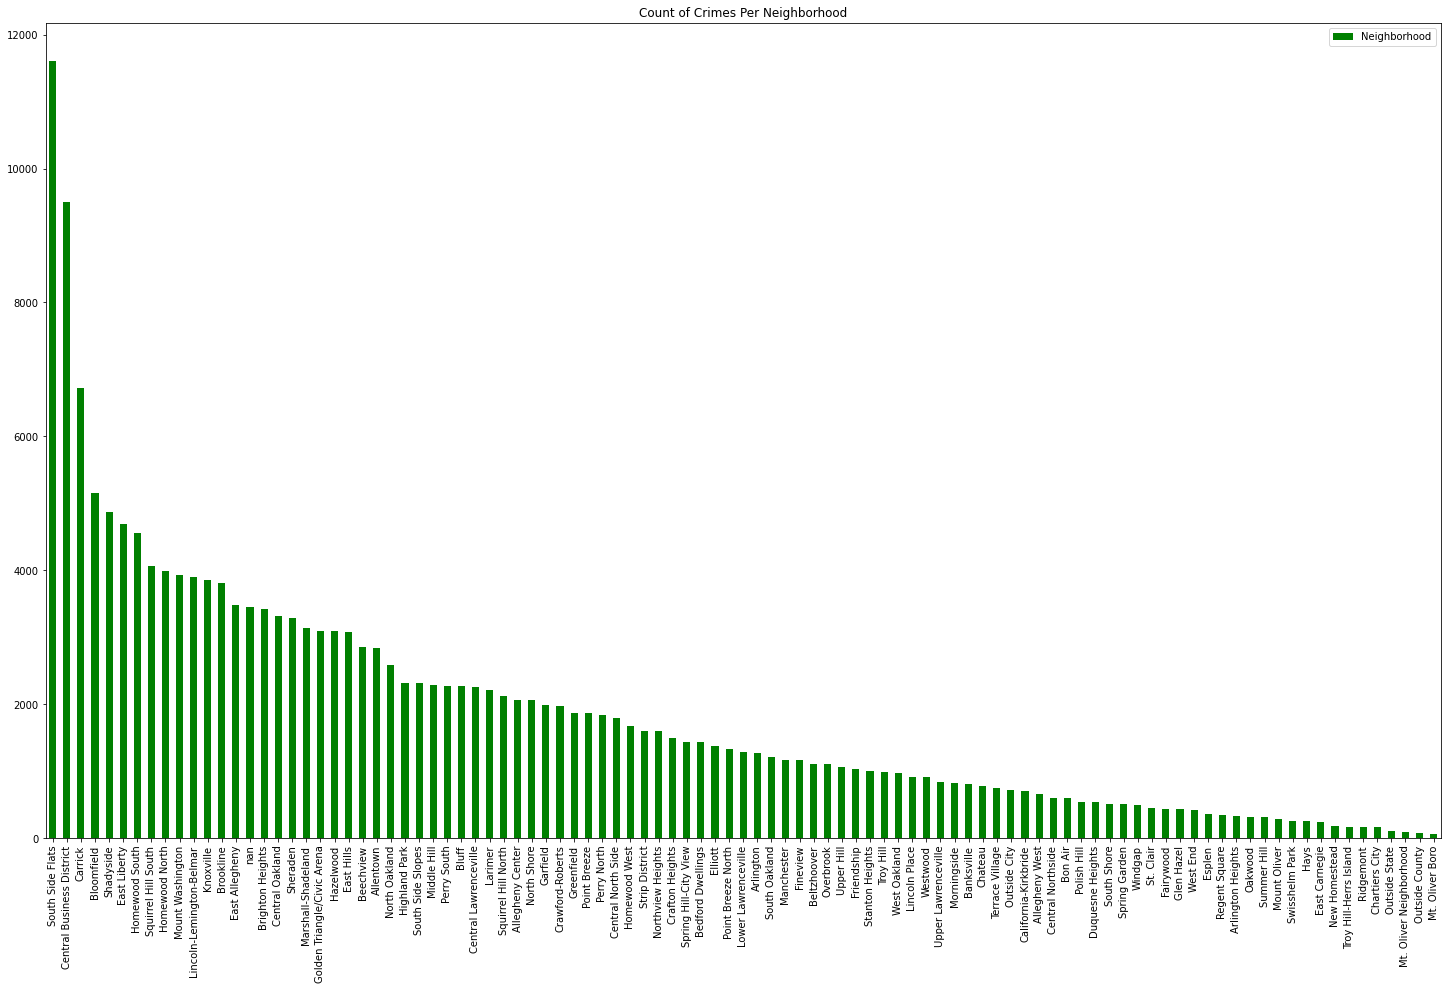

In [8]:
count_df.columns = ['Neighborhood']
sorted_count = count_df.sort_values('Neighborhood', axis = 0, ascending = False, kind = "quicksort")

sorted_count.plot(kind = "bar", figsize=(25,15), color= "green", title = "Count of Crimes Per Neighborhood")


At this point we can see that South Side Flats has the most crime while Mt. Oliver Borough has the least.

# Severity Total in Crime

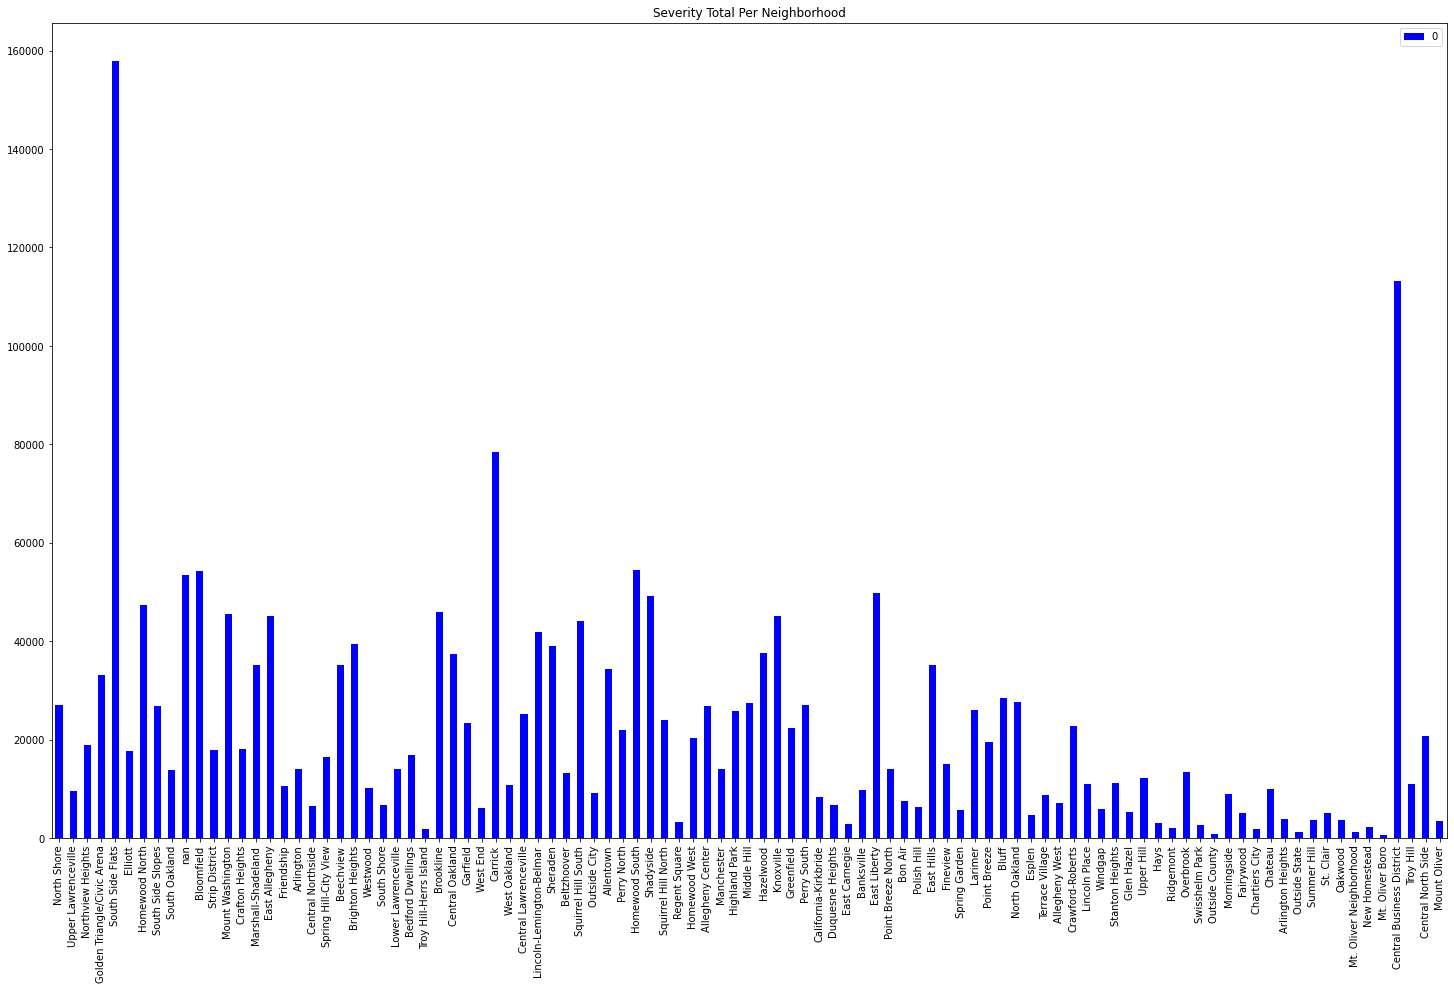

In [9]:
total_severity_df = pd.DataFrame.from_dict(dict, orient = 'index')

total_severity_df.plot(kind = "bar", figsize=(25,15), color= "blue", title = "Severity Total Per Neighborhood")


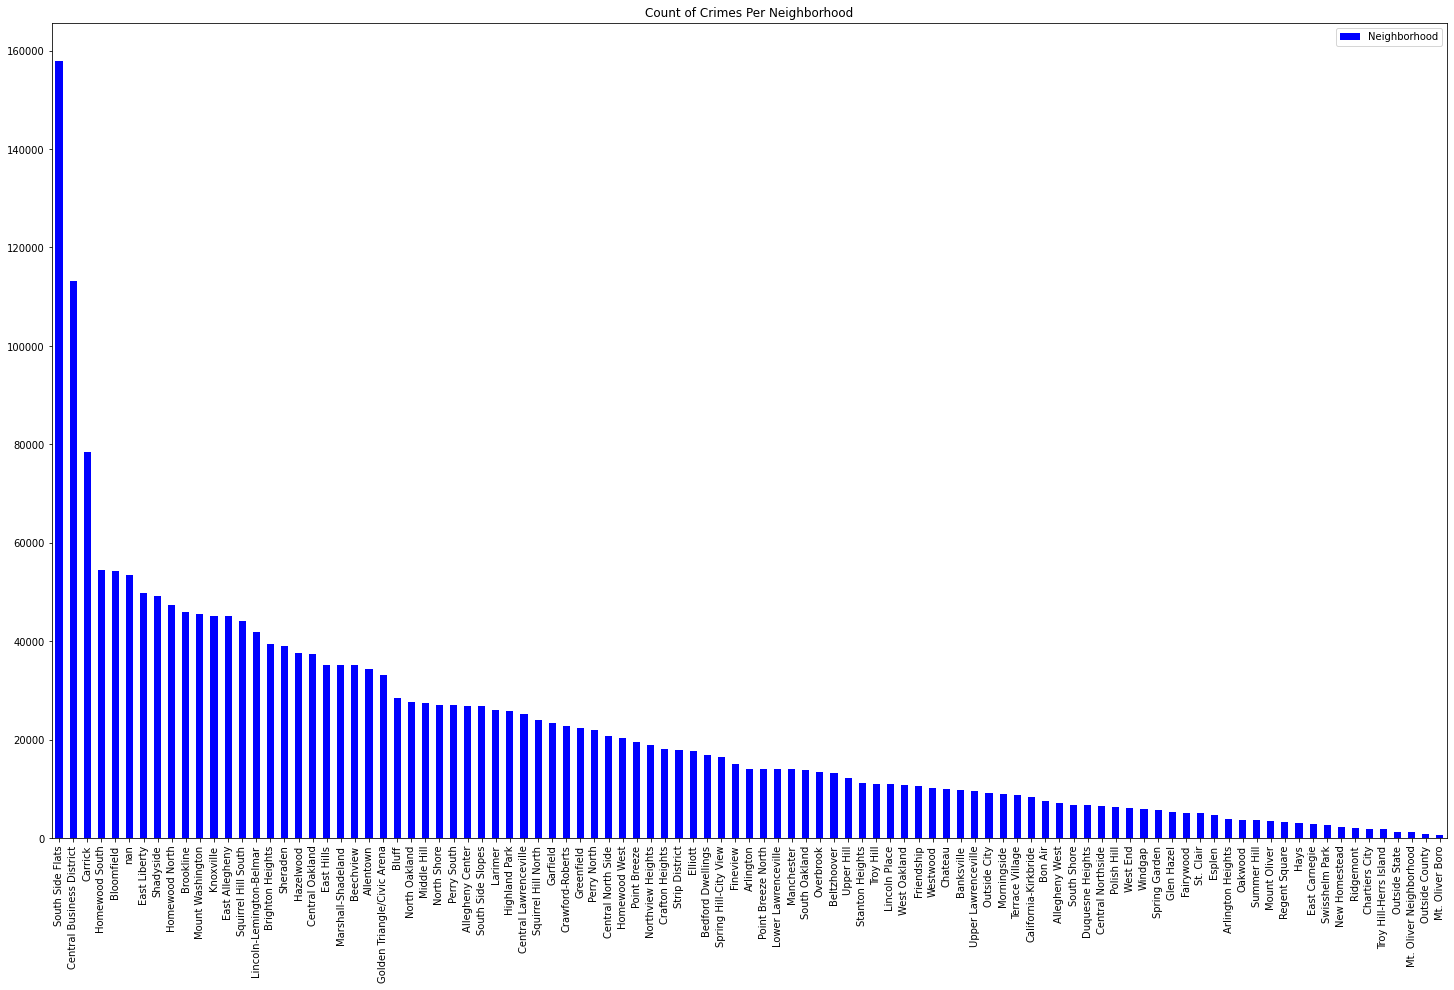

In [10]:
total_severity_df.columns = ['Neighborhood']
sorted_severity = total_severity_df.sort_values('Neighborhood', axis = 0, ascending = False, kind = "quicksort")

sorted_severity.plot(kind = "bar", figsize=(25,15), color= "blue", title = "Count of Crimes Per Neighborhood")

# Average Crime Per Neighborhood

Next, I found the averages of the crimes' hierarchy against the total count of crimes in that neighborhood.

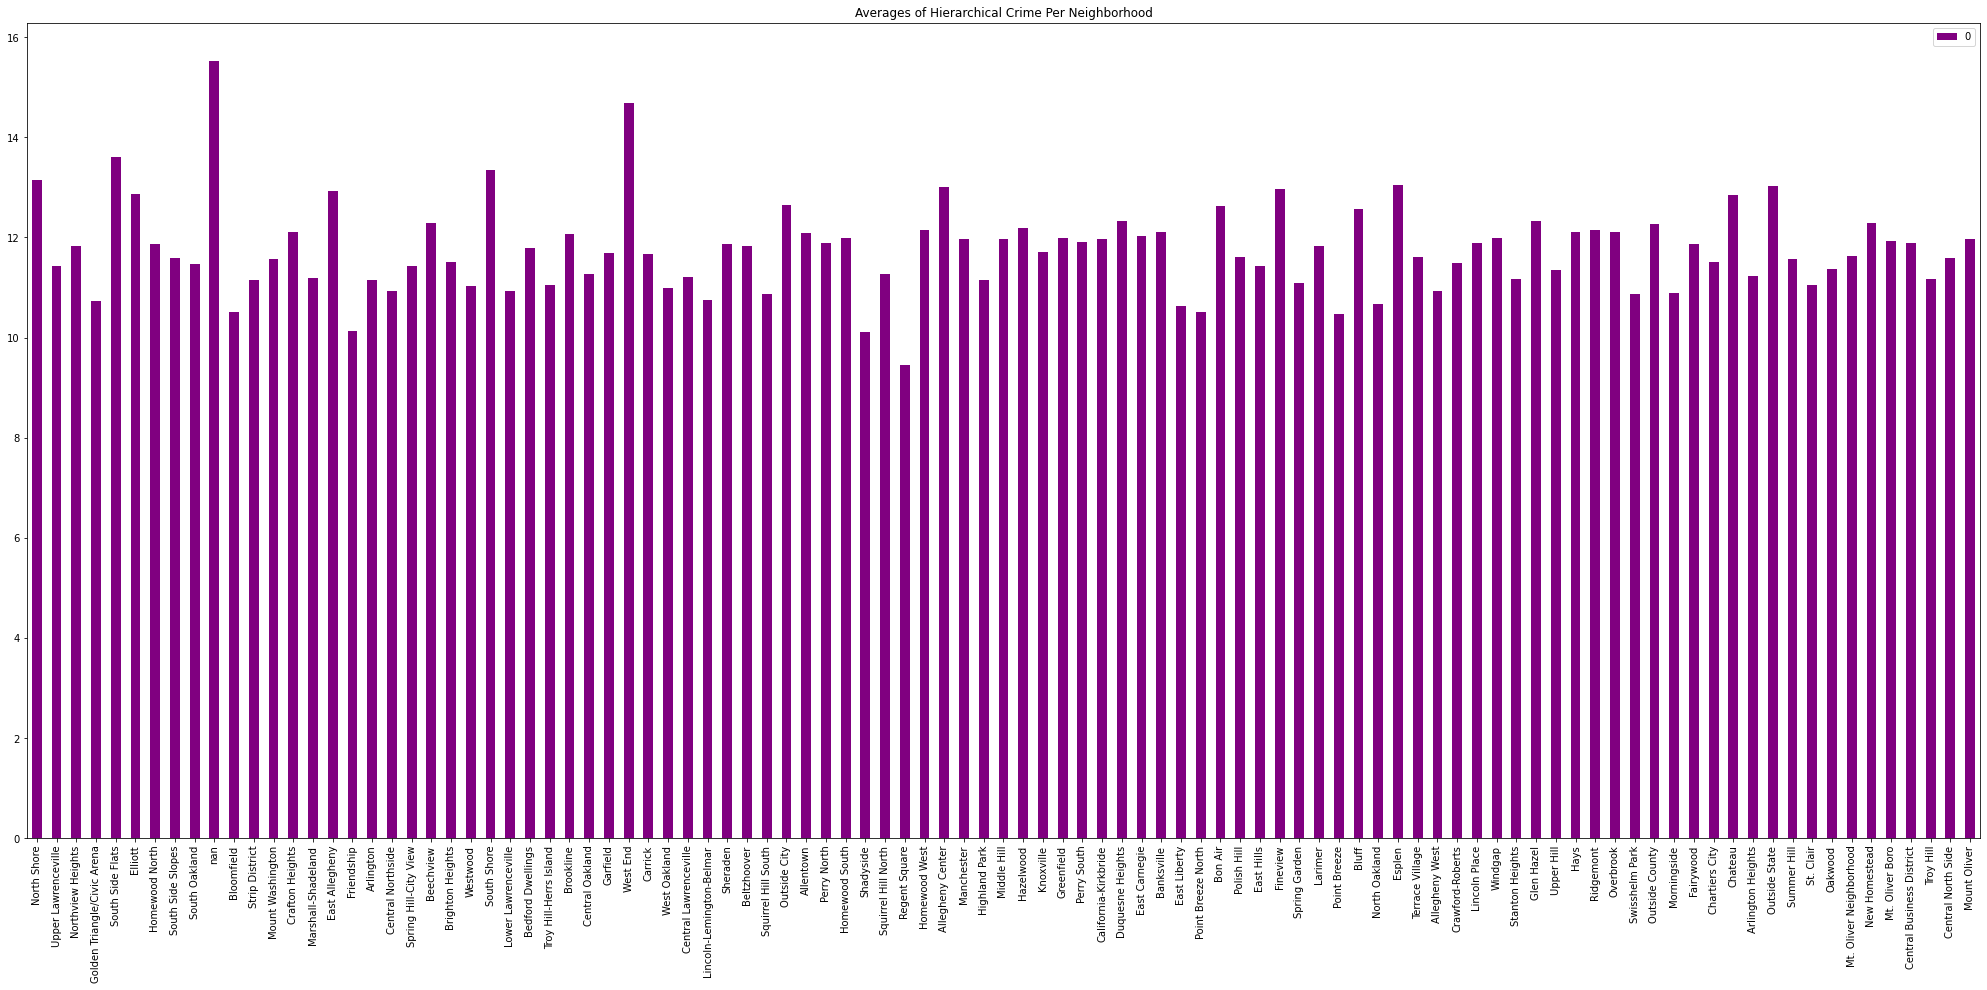

In [11]:
mean = {}
for (k,v), (k2,v2) in zip(dict.items(), dict_count.items()):
     mean[k] = v/v2     

mean_dataframe = pd.DataFrame.from_dict(mean, orient = 'index')

mean_dataframe.plot(kind = "bar", figsize=(35,15), title = "Averages of Hierarchical Crime Per Neighborhood", color = "purple")

# Sorted Averages

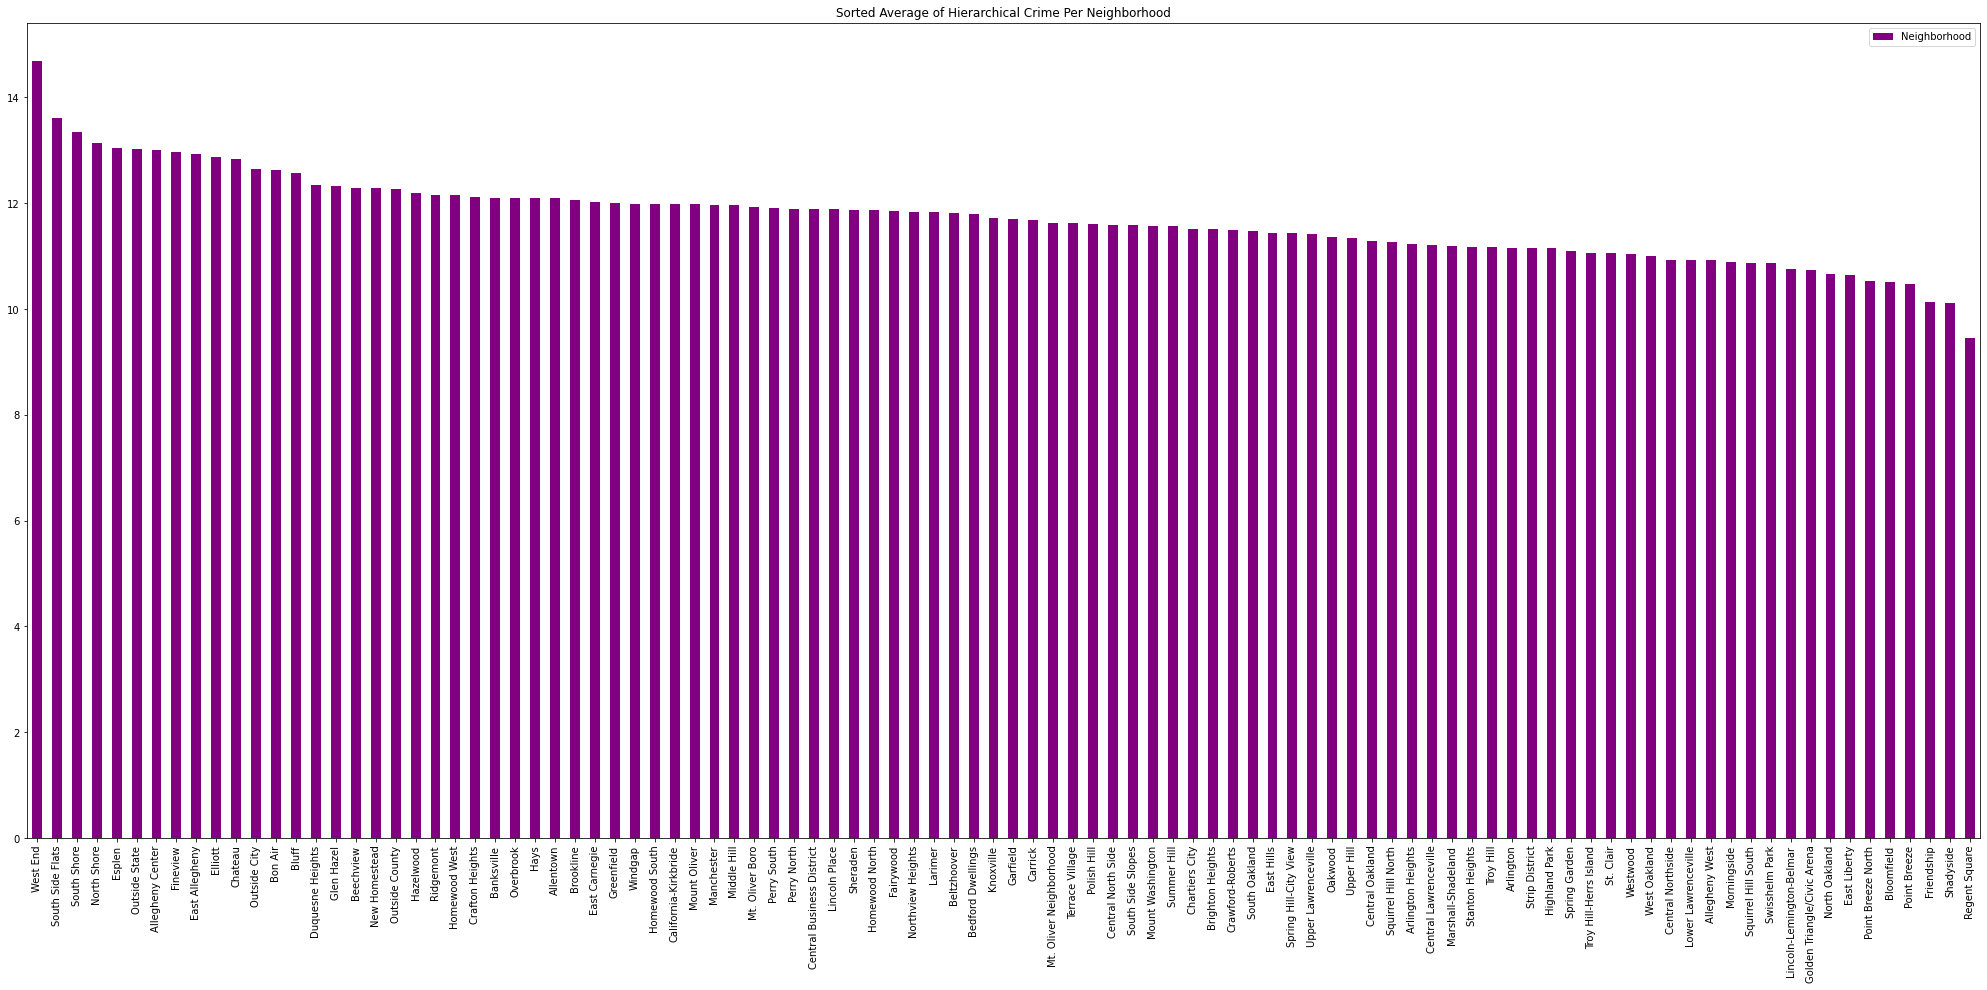

In [12]:
mean_dataframe.columns = ['Neighborhood']
sorted_mean = mean_dataframe.sort_values('Neighborhood', axis = 0, ascending = False, kind = "quicksort")
sorted_mean = sorted_mean.iloc[1: , :]
sorted_mean.plot(kind = "bar", figsize=(35,15), title = "Sorted Average of Hierarchical Crime Per Neighborhood", color = "purple")

# A Closer Look

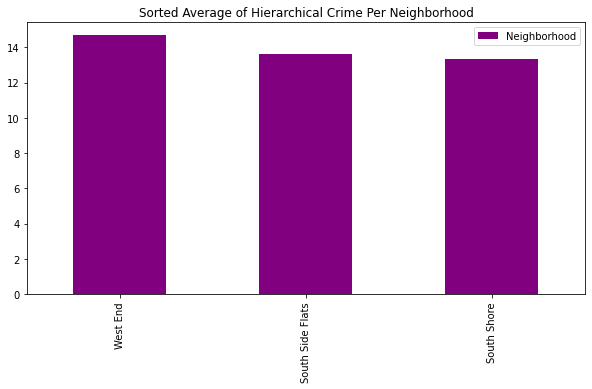

In [16]:
sorted_mean = sorted_mean.head(3)
sorted_mean.plot(kind = "bar", figsize=(10,5), title = "Sorted Average of Hierarchical Crime Per Neighborhood", color = "purple")

These are our top three results for the least average crime. However, by looking at the total counts of crime per neighborhood graph, we can see that West End and South Side Flats both have very large counts. Therefore, our true winner is South Shore!

# Conclusion
After sorting my plot of average hierachical crime, it was a lot clearer to differentiate between the worst and best neighborhoods. As a result, I conclude that this dataset shows that South shore is the best neighborhood because it has the smallest average of hierarchical crime and a low amount of overall crimes commited. This means that families and residents are in far less danger than those in other neighborhoods, which makes it safer than other neighborhoods in the city. While my favorite neighborhood is Oakland, South Oakland shows as being in the middle of the average of crime. I don't normally hear of crimes being committed around Oakland, but I suppose there are plenty for the average to be what it is. 